# Investigating the Biodiversity & Conservation of 4 U.S National Parks
## 1. Introduction
The survival of both flora and fauna is being threatened by the human impact on their environment and ecosystem. Therefore, it is essential that we are responsible for their well-being and take necessary action in order to protect and conserve. The aim of this project is to investigate which class and species are most at risk of potential extinction and hopefully give some insightful suggestions to aid their preservation.

1. To discover which classification is at highest risk
2. To determine which park poses the greatest threat to species
3. To identify the least observed species and discuss what can be done to promote their recovery.

This will be achieved by analysing datasets compiled from 4 different U.S national parks. The datasets were provided by Codecademy and are described below.

**observations.csv** - holds recorded sightings of different species at 4 national parks over a 7 day period. <br>
**species_info.csv** - contains data about different species and their conservation status. <br>

**observations** <br>
*scientific_name* - the scientific name of each species<br>
*park_name* - park where species were found<br>
*observations* - the number of times each species was observed at park<br>


**species** <br>
*category* - classification of species<br>
*scientific_name* - the scientific name of each species<br>
*common_name* - the common names of each species<br>
*conservation_status* - each species’ current conservation status<br>

A sample of both datasets can be viewed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#Read files into Jupyter Notebook
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

display(observations.head())
print('')
display(species.head())

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## 2. Data Tidying & Wrangling
This dataset is well formatted, tidy and all datatypes are in their correct form, so the only initial updates that needed to be made were:
- change column headings to be more coding-friendly <br>
- fill the NaN values in the *status* column with 'No Intervention'

In [2]:
#Change column names
observations = observations.set_axis(['scientific', 'park', 'observations'], axis=1, inplace=False)
species = species.set_axis(['category', 'scientific', 'common', 'status'], axis=1, inplace=False)

print('Observations Datatypes')
print(observations.dtypes)
print('')

print('Species Datatypes')
print(species.dtypes)
print('')

print('Species Null Values')
print(species.info())
print('')

#Fill NaN values
species.fillna('No Intervention', inplace=True)

null_values = species.status.isna().sum()
print(f'After using .fillna(), there are now {null_values} null values in the dataset')

Observations Datatypes
scientific      object
park            object
observations     int64
dtype: object

Species Datatypes
category      object
scientific    object
common        object
status        object
dtype: object

Species Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    5821 non-null   object
 1   scientific  5821 non-null   object
 2   common      5821 non-null   object
 3   status      189 non-null    object
dtypes: object(4)
memory usage: 182.0+ KB
None

After using .fillna(), there are now 0 null values in the dataset


## 3. Inspect Data

After inspecting the data it was found that:
* The data is taken from 4 National Parks.
* There are 7 different Species Classes.
* There are 5 Conservation Status categories.
* There are more scientific names than common names suggesting different scientific names having the same common name.
* The observations ranged from 9 - 321.
* The observation data had a skew of 0.58 and a mean > median suggesting a positive (right) skew.

More in-depth analysis of the dataset can be found below in the output.

The names of the 4 national parks are
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

The species classes are
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

The different conservation statuses are
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']

There are 5502 common species name and 5541 scientific species names

The range, skew and distribution of the observations are


count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

Skew: 0.5800296266205329


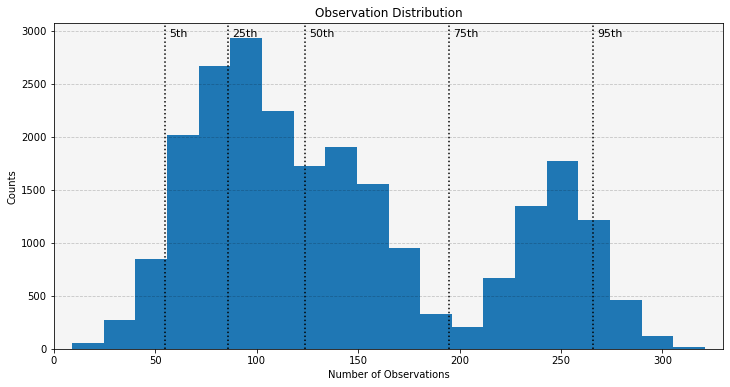

In [3]:
#Print unique names of park, category and status column.
print('The names of the 4 national parks are')
print(observations.park.unique())
print('')
print('The species classes are')
print(species.category.unique())
print('')
print('The different conservation statuses are')
print(species.status.unique())
print('')

#Print length of unique common and scientific names
print(f'There are {len(species.common.unique())} common species name and {len(species.scientific.unique())} scientific species names')
print('')

#Describe observations data 
print('The range, skew and distribution of the observations are')
display(observations.observations.describe())

#Plot histogram of Observation Data
plt.figure(figsize=(12,6))
ax=plt.subplot()
plt.hist(observations.observations, bins=20)
plt.title('Observation Distribution')
plt.ylabel('Counts')
plt.xlabel('Number of Observations')
ax.set_xlim(0,330)
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.2, color='black')
ax.set_facecolor('whitesmoke')

#Plot 5th, 25th, 50th, 75th & 95th quantile of data as a verticle line on histogram
quant_5, quant_25, quant_50, quant_75, quant_95 = observations.observations.quantile(0.05), observations.observations.quantile(0.25), observations.observations.quantile(0.5), observations.observations.quantile(0.75), observations.observations.quantile(0.95)
quants = [[quant_5], [quant_25], [quant_50], [quant_75], [quant_95]]
labels = ['5th', '25th', '50th', '75th', '95th']

for quant in quants:
    plt.axvline(x=quant, color='black', linestyle = ':')

# Label quantiles on histogram
ax.text(quant_5+2, 2950, "5th", size = 11)
ax.text(quant_25+2, 2950, "25th", size = 11)
ax.text(quant_50+2, 2950, "50th", size = 11)
ax.text(quant_75+2, 2950, "75th", size = 11)
ax.text(quant_95+2, 2950, "95th", size = 11)

#Print skew of observation data
print(f'Skew: {observations.observations.skew()}')

## 4 Results & Discussion
### 4.1 Which Species Classification is at Highest Risk?

Firstly, the class of species that are in a state of conservation were considered. A contingency table was developed which portrays the frequency distribution of the species classes for each conservation status. This data is used to determine which classes are more likely to be in need of protection and therefore, who is at a higher risk.



In [4]:
#pd.crosstab function to create contingency table of status vs category
xtab = pd.crosstab(species.category, species.status)
cols = ['No Intervention', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
xtab=xtab[cols]
xtab_t = xtab.T

display(xtab)
print('How many of each Class are Protected and Unprotected')

status,No Intervention,In Recovery,Species of Concern,Threatened,Endangered
category,,,,,
Amphibian,73,0,4,2,1
Bird,442,3,72,0,4
Fish,116,0,4,4,3
Mammal,176,1,28,2,5
Nonvascular Plant,328,0,5,0,0
Reptile,74,0,5,0,0
Vascular Plant,4423,0,43,2,1


How many of each Class are Protected and Unprotected


Next, to gather the data as a percentage, the frequency of species was divided by the total number of species in each conservation status and displayed as a percentage. A colormap was also applied to the table, with red showing the classes with the greatest frequeny in each conservation status.

This data was then portrayed in a stacked bar chart with each class making up a componenet of 100%.

In [5]:
for item in cols:
    xtab[item] = round((xtab[item] / sum(xtab[item])) * 100, 1)

display(xtab.style.background_gradient(subset=['Species of Concern', 'Threatened', 'Endangered', 'In Recovery'], cmap='YlOrRd'))
print('Which Class accounts for each Conservation Status ')

status,No Intervention,In Recovery,Species of Concern,Threatened,Endangered
category,,,,,
Amphibian,1.300000,0.000000,2.500000,20.000000,7.100000
Bird,7.800000,75.000000,44.700000,0.000000,28.600000
Fish,2.100000,0.000000,2.500000,40.000000,21.400000
Mammal,3.100000,25.000000,17.400000,20.000000,35.700000
Nonvascular Plant,5.800000,0.000000,3.100000,0.000000,0.000000
Reptile,1.300000,0.000000,3.100000,0.000000,0.000000
Vascular Plant,78.500000,0.000000,26.700000,20.000000,7.100000


Which Class accounts for each Conservation Status 


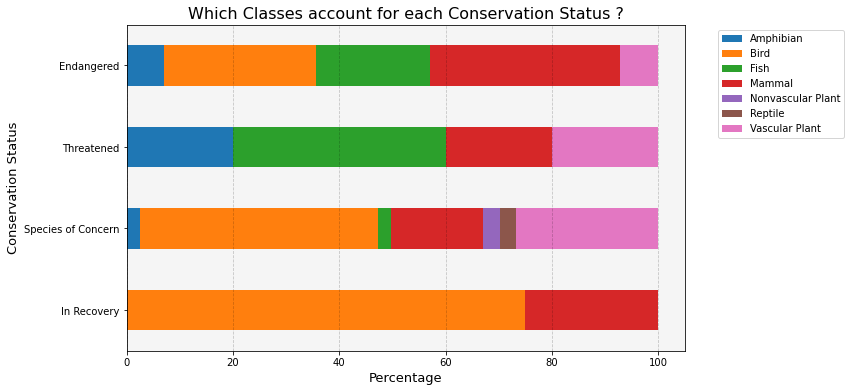

<Figure size 432x288 with 0 Axes>

In [6]:
#Plot stacked bar chart with dta from above table
xtab_adj = xtab.drop(columns='No Intervention')
xtab_adj = xtab_adj.T
stackedbar = xtab_adj.plot(kind = 'barh', figsize=(10,6), stacked=True)
stackedbar.set_xlabel('Percentage', fontsize=13)
stackedbar.set_ylabel('Conservation Status', fontsize=13)
stackedbar.set_title('Which Classes account for each Conservation Status ?', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
stackedbar.grid(zorder=0, linestyle='dashed', axis='x', alpha=0.2, color='black')
stackedbar.set_facecolor('whitesmoke')
plt.show()
plt.clf()

As shown by the data, Mammals, Birds and Fish account for a worrying number of the total Endangered species, with 35.7%, 28.6% and 21.4% respectively.

In addition to this, Mammals and Fish also have a high percentage of threatened species, and Birds top the Species of Concern status. If nothing is done about their conservation, we could see higher numbers of these classes falling into the Endangered Category in the future.

Some work is being done at the moment to aid the recovery of Birds and Mammals, however, one could argue not enough as only 3 bird and 1 mammal species are currently In Recovery.

The number of Amphibian and Vascular Plant species need to continue to be monitored as several of these species are under protection.

At present, Reptiles and Nonvascular Plants are at a low risk with only small numbers being identified as Species of Concern.

Finally, we look at the frequency distribution table as a percentage of total number of species for each class with its corresponding stacked bar graph.

In [7]:
cols2 = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile',
       'Vascular Plant']

#For each Class, divide frequency by total frequency of class
for item in cols2:
    count = len(species[species.category == item])
    xtab_t[item] = round((xtab_t[item] / count) * 100,1)
xtab_tt = xtab_t.T

display(xtab_tt.style.background_gradient(subset=['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], cmap='YlOrRd'))
print('What Percentage of each Class are at Risk?')

status,No Intervention,In Recovery,Species of Concern,Threatened,Endangered
category,,,,,
Amphibian,91.200000,0.000000,5.000000,2.500000,1.200000
Bird,84.800000,0.600000,13.800000,0.000000,0.800000
Fish,91.300000,0.000000,3.100000,3.100000,2.400000
Mammal,83.000000,0.500000,13.200000,0.900000,2.400000
Nonvascular Plant,98.500000,0.000000,1.500000,0.000000,0.000000
Reptile,93.700000,0.000000,6.300000,0.000000,0.000000
Vascular Plant,99.000000,0.000000,1.000000,0.000000,0.000000


What Percentage of each Class are at Risk?


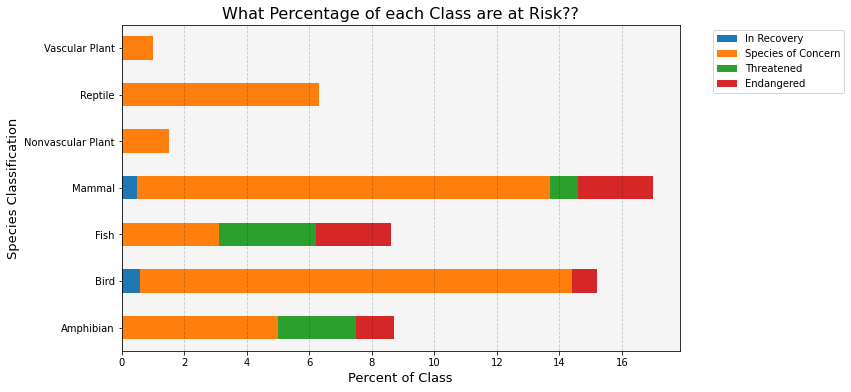

<Figure size 432x288 with 0 Axes>

In [8]:
#Plot stacked bar graph from above table
xtab_tt_adj = xtab_tt.drop(columns='No Intervention')
stackedbar = xtab_tt_adj.plot(kind = 'barh', figsize=(10,6), stacked=True)
stackedbar.set_xlabel('Percent of Class', fontsize=13)
stackedbar.set_ylabel('Species Classification', fontsize=13)
stackedbar.set_title('What Percentage of each Class are at Risk??', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
stackedbar.grid(zorder=0, linestyle='dashed', axis='x', alpha=0.2, color='black')
stackedbar.set_facecolor('whitesmoke')
plt.show()
plt.clf()

* Due to the large number of plant species observed, only around 1% of plants are currently protected. These can be placed under low risk.
* It is apparent now that both Reptiles and Amphibians are at a higher risk that previously thought. About 6% of all reptiles are Species of Concern. About 8.5% of Amphibians are Protected. Both have no species In Recovery.
* A staggering 13% of all Mammals and Birds are Species of Concern. In addition 2.4% of Mammals are endangered with around 17% of all Mammals in need of protection (the highest percentage).
* Although only around 8% of Bird species are protected, 2.5% and 3.1% are Threatened and Endangered, the greatest number of all species.


### 4.2 Which Park poses the Greatest Threat?
Next, we analysed which National Park had the greatest negative impact on its flora and fauna. This was determined by which park had the greatest number of species in need of protection compared with the other parks.

In order to perform this analysis, we had to begin by merging the 2 datasets using pd.merge, joining on the scientific name column.

In [9]:
#Merge the 2 datasets 
merge = pd.merge(observations, species, on = 'scientific', how = 'right',
                indicator = False)
display(merge.head())

,scientific,park,observations,category,common,status
0,Clethrionomys gapperi gapperi,Bryce National Park,130,Mammal,Gapper's Red-Backed Vole,No Intervention
1,Clethrionomys gapperi gapperi,Yellowstone National Park,270,Mammal,Gapper's Red-Backed Vole,No Intervention
2,Clethrionomys gapperi gapperi,Great Smoky Mountains National Park,98,Mammal,Gapper's Red-Backed Vole,No Intervention
3,Clethrionomys gapperi gapperi,Yosemite National Park,117,Mammal,Gapper's Red-Backed Vole,No Intervention
4,Bos bison,Yosemite National Park,128,Mammal,"American Bison, Bison",No Intervention


A dataframe was complied displaying the total sum of observations, grouped by national park name and conservation status.

As each park varies largely in both total land area and total number of species observed, next, the frequency distribution was then divided by the total number of observations per park, giving the observation density per park.

Then to easily portray the data and compared parks together, the data was normalised by giving it a percentage compared to the other parks.

In [10]:
status = ['Endangered', 'In Recovery', 'No Intervention', 'Species of Concern', 'Threatened']
parks = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

#Create df with park names as row headings
parks_df = pd.DataFrame(parks, columns=['parks'])

#Group merge df by park and status and adding sum of observations into parks_df
for item in status:
    temp = merge[merge.status == item]
    temp = temp.groupby('park').sum()
    lst = temp.observations.tolist()
    parks_df[item] = lst
    
display(parks_df)
print('Total Observation Count per Park')

#Finding sum of all observations per park and adding to obs_count list
obs_count = []
for name in parks:
    namedf = merge[merge.park == name]
    count = namedf.observations.sum()
    obs_count.append(count)

# Dividing each row of parks_df by total observations per park
sr = pd.Series(obs_count)
parks_df_adj = parks_df.drop(columns='parks')
parks_df_adj = parks_df_adj.div(sr, axis=0) * 100

#Converting data to a percentage so each conservation status totalled 100%
for item in status:
    parks_df_adj[item] = round((parks_df_adj[item] / sum(parks_df_adj[item])) * 100, 2)

# Transpose park_df so column headings are park names
parks_df_adj = parks_df_adj.T
parks_df_adj = parks_df_adj.set_axis(['Bryce National Park', 'Great Smoky Mountains National Park',
                       'Yellowstone National Park', 'Yosemite National Park'], axis=1, inplace=False)

print('')
display(parks_df_adj)
print('The Observation Density as a Percentage in Comparison to Other Parks')

,parks,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
0,Bryce National Park,359,388,614549,17011,591
1,Great Smoky Mountains National Park,275,248,461886,11735,440
2,Yellowstone National Park,898,889,1542612,40677,1459
3,Yosemite National Park,551,582,922226,24539,849


Total Observation Count per Park



,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
Endangered,24.73,25.27,24.68,25.32
In Recovery,26.55,22.63,24.26,26.56
No Intervention,24.97,25.03,25.00,25.00
Species of Concern,26.07,23.98,24.87,25.08
Threatened,25.41,25.23,25.02,24.35


The Observation Density as a Percentage in Comparison to Other Parks


This data was then plotted on a side by side bar chart.

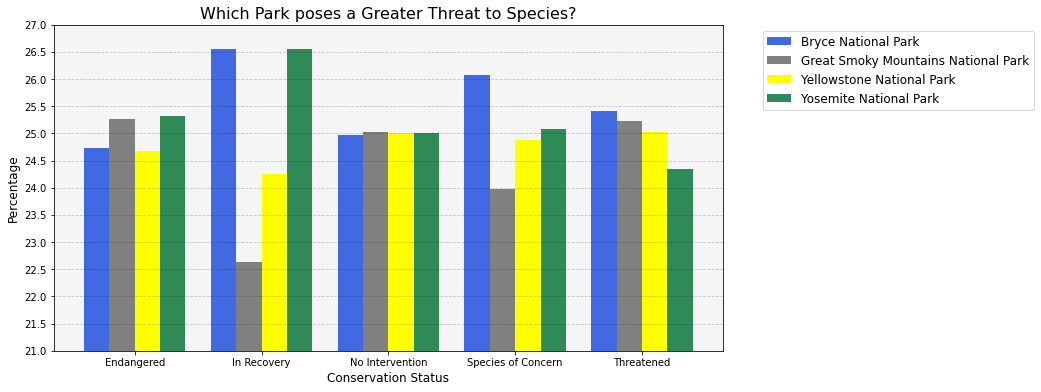

<Figure size 432x288 with 0 Axes>

In [11]:
#Plot side by side bar chart using above table
N = 5
ind = np.arange(N)
width = 0.2

yb = parks_df_adj['Bryce National Park']
yg=parks_df_adj['Great Smoky Mountains National Park']
yye = parks_df_adj['Yellowstone National Park']
yyo=parks_df_adj['Yosemite National Park']

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.bar(ind-width, yb, width, color='royalblue')
plt.bar(ind, yg, width, color='grey')
plt.bar(ind+width, yye, width, color='yellow')
plt.bar(ind+width*2, yyo, width, color='seagreen')

ax.set_title('Which Park poses a Greater Threat to Species?', fontsize=16)
ax.set_xlabel('Conservation Status', fontsize=12)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(status)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_yticks(np.arange (21, 27.5, 0.5))
ax.set_yticklabels(np.arange (21, 27.5, 0.5))
ax.set_ylim(21,27)

ax.legend(parks, bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=12)
ax.grid(zorder=0, linestyle='dashed', axis='y', alpha=0.2, color='black')
ax.set_facecolor('whitesmoke')

plt.show()
plt.clf()

Bryce National Park has a relatively low number of Endangered species, however, it also has the greatest number of Threatened and Species of Concern. Luckily, their In Recovery program is more active than other parks suggesting Species of Concern are aided before they can fall into Endangered. This park is a MEDIUM THREAT.

Great Smoky Mountains National Park unfortunately has a high proportion of Endangered and Threatened Species. The park may also need to introduce more species into an In Reovery program otherwise these numbers may escalate in the future. This park is a HIGH THREAT.

Yellowstone National Park has a comparably low number of species in need of protection, suggesting this park has a smaller negative impact on animals and plants. In future they could increase the number of species In Recovery so that even fewer are in protection. This park is a LOW THREAT.

Yosemite National Park has the greatest proportion of species Endangered, but also In Recovery as well. This park is a MEDIUM THREAT.

### 4.3 Which are the Least Observed Species?

The 5 least observed species in each park where analysed. In particular their Classification and Conservation Status. An insight into this can hopefully help determine how to aid and conserve the species which are most at risk.

A dataframe was created which was complied of the lowest 5 observed species in each park.

In [12]:
#Lowest 5 observations found in each park and added to min_df
min_lst = []
for item in parks:
    temp = merge[merge.park == item]
    min5 = temp.nsmallest(5, ['observations'])
    min_lst.append(min5)

min_df = pd.concat(min_lst)
display(min_df)

,scientific,park,observations,category,common,status
19065,Corydalis aurea,Bryce National Park,9,Vascular Plant,"Golden Corydalis, Scrambled Eggs",No Intervention
16241,Arenaria serpyllifolia,Bryce National Park,19,Vascular Plant,Thymeleaf Sandwort,No Intervention
1256,Vermivora bachmanii,Bryce National Park,20,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
2474,Noturus baileyi,Bryce National Park,22,Fish,Smoky Madtom,Endangered
19650,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered
22514,Collomia tinctoria,Great Smoky Mountains National Park,10,Vascular Plant,"Staining Collomia, Yellowstain Collomia",No Intervention
20313,Strix occidentalis,Great Smoky Mountains National Park,11,Bird,Spotted Owl,No Intervention
20431,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
22379,Sambucus mexicana,Great Smoky Mountains National Park,12,Vascular Plant,Mexican Elder,No Intervention
46,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered


Already, it is apparent that Wolves frequent this dataframe, with canis lupus (Grey Wolf) and canis rufus (Red Wolf) appearing 2 and 3 times repsectively out of 4 parks. This is a species whose survival is being impacted all over and not just in one park.

Another species which stands out, the Spotted Owl, was only observed 11 times, however, the bird has no protective status. Its lack of observations may be due to the nocturnal nature of the animal.

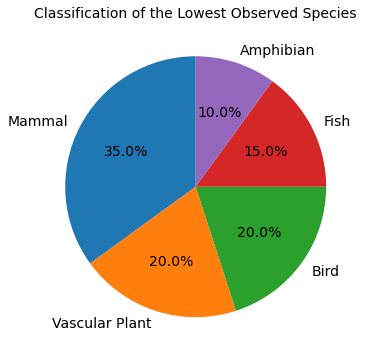

<Figure size 432x288 with 0 Axes>

In [13]:
#Plot pie chart of Classification
data2 = min_df.category.value_counts().tolist()
labels2 = min_df.category.value_counts().index

plt.figure(figsize=(12,6))
plt.pie(data2, labels=labels2, autopct='%1.1f%%', startangle=90, textprops=dict(fontsize=14))
plt.title('Classification of the Lowest Observed Species', fontsize=14)
plt.show()
plt.clf()

* Again, Mammals are shown to be the class most at risk, with birds also present.
* Vascular Plants make up 20% of the lowest 20 observed species. More worryingly, all of these plants are place under 'No Intervention'
* Fish and Amphibians are also included in the lowest 20, all being Endangered.

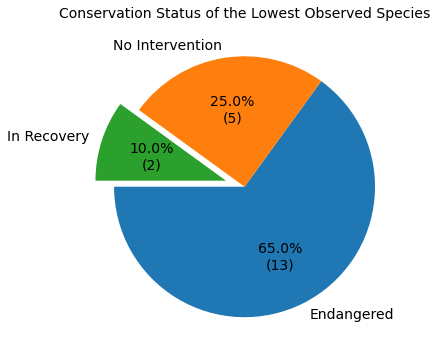

<Figure size 432x288 with 0 Axes>

In [14]:
#Plot pie chart of Conservation Status
data = min_df.status.value_counts().tolist()
labels = min_df.status.value_counts().index
explode = (0, 0, 0.15)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(data, autopct=lambda pct: func(pct, data), explode=explode, labels=labels,
                                  startangle=180, textprops=dict(fontsize=14))

plt.title('Conservation Status of the Lowest Observed Species', fontsize=14)
plt.show()
plt.clf()

* As expected, 65% of the lowest observed species are Endangered.
* Only 10% are In Recovery. To protect these species from extinction, I believe more needs to be done for the recovery of the species who are endangered.
* 25% have no protection status. Perhaps it was decided that although these species are extremely infrequent, this is not an issue for their future survival. 